In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('adult-training.csv')
test=pd.read_csv('adult-test.csv')

In [4]:
train.columns=['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','gender','capitalgain', 'capitalloss', 'hoursper_week','nativecountry','income_bracket']
test.columns=train.columns

In [5]:
train.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursper_week,nativecountry,income_bracket
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
test.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursper_week,nativecountry,income_bracket
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educationnum    32560 non-null  int64 
 5   maritalstatus   32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capitalgain     32560 non-null  int64 
 11  capitalloss     32560 non-null  int64 
 12  hoursper_week   32560 non-null  int64 
 13  nativecountry   32560 non-null  object
 14  income_bracket  32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# PRE-PROCESSING
#1. CHECK MISSING DATA
#2. CONVERT DATATYPE APPROPRIATELY
#3. CHECK DUPLICATE DATA
#NUMERICAL
#4. VARIABLE MAGNITUDE
#5. VARIABLE DISTRIBUTION
#CATEGORICAL
#6. ENCODING

In [9]:
# CHECK UNIQUE elements of all objects
def check_unique(df):
    for col in df:
        if df[col].dtypes=='O':
            print(df[col].unique())
            
# REPLACE NAN
def replaceNan(df):
    for col in df.columns:
        if df[col].dtypes=='O':
            df[col]=df[col].str.strip().map(lambda x: np.nan if x=="?" else x)           
    return df
             
    
print("###BEFORE REPLACEMENT###")
check_unique(train)
# It is observed that missing data represented as '?' is present in fields workclass, occupation, nativecountry
# Lets replace them with NaN and proceed with missing data imputations if required

train=replaceNan(train)    


print("###AFTER REPLACEMENT###")
check_unique(train)

#Do the same for test data
test=replaceNan(test) 


###BEFORE REPLACEMENT###
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' Engl

5.638820638820639
5.66031941031941
1.7905405405405406
Shape before deletion (32560, 15)
Shape after deletion (30161, 15)


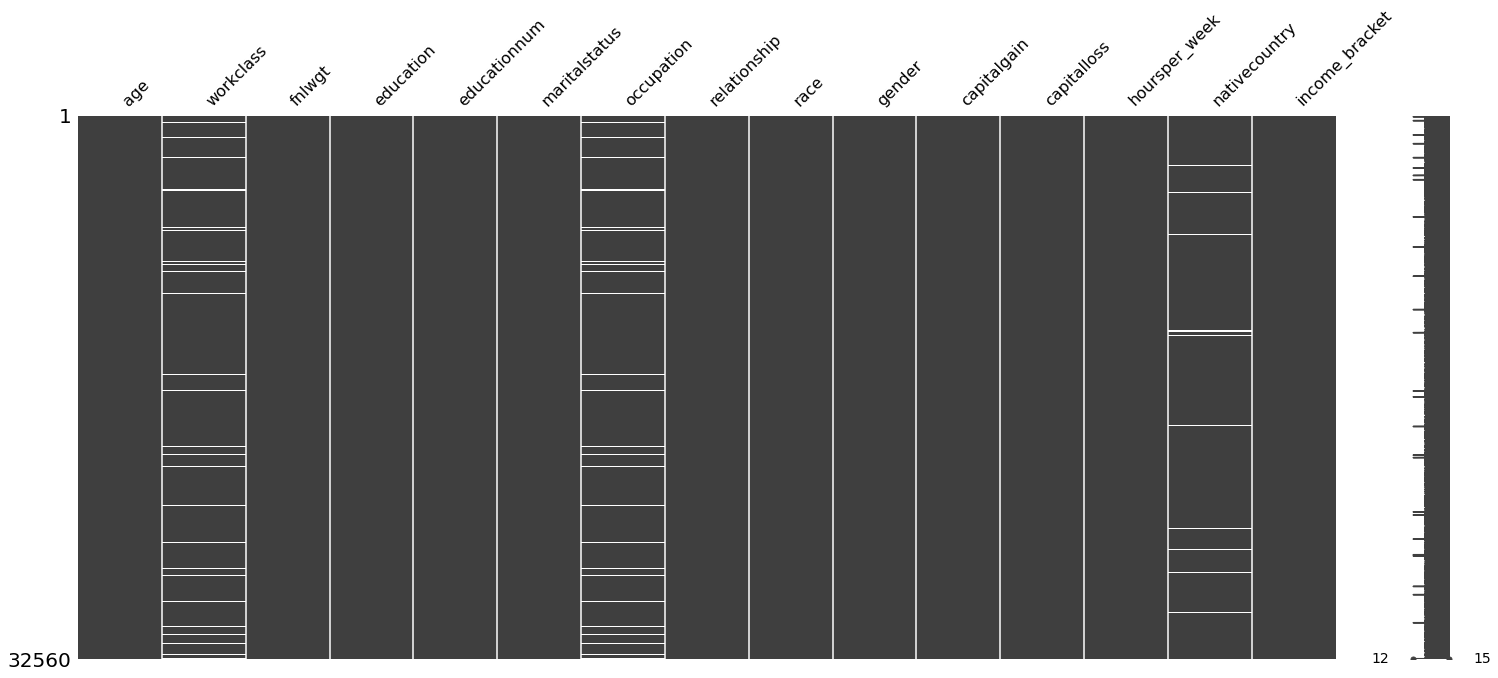

In [10]:
# train.workclass.isna().sum()/len(train)*100
# train.occupation.isna().sum()/len(train)*100
# train.nativecountry.isna().sum()/len(train)*100


def checkMissingDataVol(df,var):
    for col in var:
        print(df[col].isna().sum()/len(df)*100)
        
checkMissingDataVol(train,['workclass','occupation','nativecountry'])   

#Since only 5% of data is missing we can eliminate them

import missingno as msno
msno.matrix(train)

# All other columns looks good. Hencewe shall eliminate only the missing records identified above

print(f'Shape before deletion {train.shape}')
train.dropna(inplace=True)
print(f'Shape after deletion {train.shape}')

In [11]:
from sklearn.preprocessing import LabelEncoder


def encode_var(df):
    for col in df:
        if df[col].dtypes=='O':
            le=LabelEncoder()
            df[col]=le.fit_transform(df[col])
    return df


train=encode_var(train)
test=encode_var(test)


In [12]:
# CHECK UPDATED DATA TYPE
train.info()

train.income_bracket=train.income_bracket.astype('category')
test.income_bracket=test.income_bracket.astype('category')

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30161 non-null  int64
 1   workclass       30161 non-null  int32
 2   fnlwgt          30161 non-null  int64
 3   education       30161 non-null  int32
 4   educationnum    30161 non-null  int64
 5   maritalstatus   30161 non-null  int32
 6   occupation      30161 non-null  int32
 7   relationship    30161 non-null  int32
 8   race            30161 non-null  int32
 9   gender          30161 non-null  int32
 10  capitalgain     30161 non-null  int64
 11  capitalloss     30161 non-null  int64
 12  hoursper_week   30161 non-null  int64
 13  nativecountry   30161 non-null  int32
 14  income_bracket  30161 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 # 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'educationnum'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>],
       [<AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursper_week'}>,
        <AxesSubplot:title={'center':'nativecountry'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

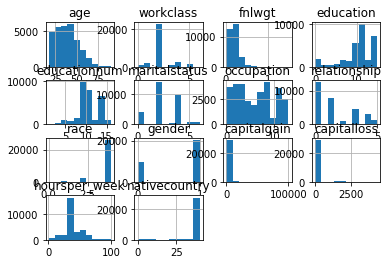

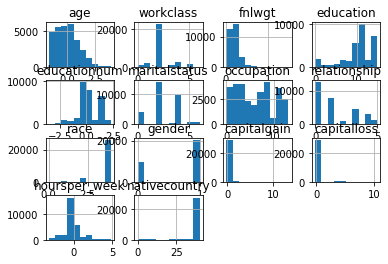

In [13]:
# CHECK VARIABLE MAGNITUDE OF age, educationnum, capitalgain, capitalloss, hoursper_week

train.hist()

from sklearn.preprocessing import StandardScaler

def scale_var(df,df1,var):
    scaler=StandardScaler()
    scaler.fit(df[var])
    return scaler.transform(df[var]), scaler.transform(df1[var])

train.age,test.age=scale_var(train,test,['age'])
train.educationnum,test.educationnum=scale_var(train,test,['educationnum'])
train.capitalgain,test.capitalgain=scale_var(train,test,['capitalgain'])
train.capitalloss,test.capitalloss=scale_var(train,test,['capitalloss'])
train.hoursper_week,test.hoursper_week=scale_var(train,test,['hoursper_week'])
# train.educationnum=scale_var(train,['educationnum'])
# train.capitalgain=scale_var(train,['capitalgain'])
# train.capitalloss=scale_var(train,['capitalloss'])
# train.hoursper_week=scale_var(train,['hoursper_week'])


# test.age=scale_var(test,['age'])
# test.educationnum=scale_var(test,['educationnum'])
# test.capitalgain=scale_var(test,['capitalgain'])
# test.capitalloss=scale_var(test,['capitalloss'])
# test.hoursper_week=scale_var(test,['hoursper_week'])

train.hist()


In [14]:
# TRAIN TEST SPLIT X & Y
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [15]:
# BUILD MODEL

from sklearn.svm import SVC
classifier=SVC()

classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.7637592137592137

In [ ]:
# X_train,y_train=train.iloc[:,:-1],train.iloc[:,-1]
# X_test,y_test=test.iloc[:,:-1],test.iloc[:,-1]

In [1]:
# Question 2: Unsupervised Learning 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail=pd.read_csv('OnlineRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


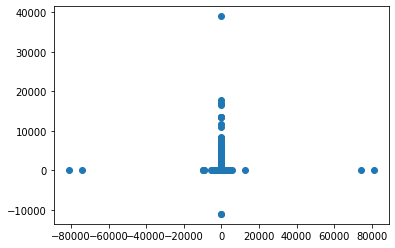

In [4]:
# sns.jointplot(x='Quantity',y='UnitPrice',data=retail)
plt.scatter(retail.Quantity,retail.UnitPrice)

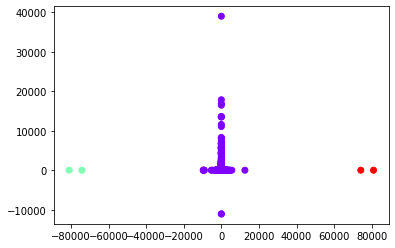

In [16]:
from sklearn.cluster import KMeans

X=retail.iloc[:,[3,5]]

# WITH 3 CLUSTERS
km=KMeans(n_clusters=3)
custers_identified=km.fit_predict(X)

df_cluster=X.copy()

df_cluster['cluster']=custers_identified
plt.scatter(df_cluster.Quantity,df_cluster.UnitPrice,c=df_cluster.cluster,cmap='rainbow')


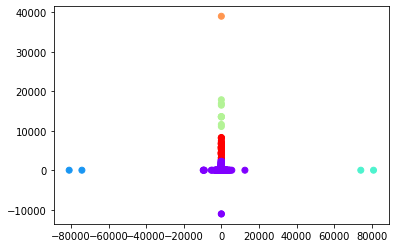

In [17]:
# WITH 6 CLUSTERS
km=KMeans(n_clusters=6)
custers_identified=km.fit_predict(X)

df_cluster=X.copy()

df_cluster['cluster']=custers_identified
plt.scatter(df_cluster.Quantity,df_cluster.UnitPrice,c=df_cluster.cluster,cmap='rainbow')

In [ ]:
#1.Redo question 1 and 2 above (or something very similar) to use ML algorithms on Spark – specifically be sure you are using the Spark MLib or a related Spark ML library if they have renamed (again) it since I wrote this question.  

#2.Compare the performance of running the Spark version versus running ‘natively’ (i.e. the not Spark version).  Do you get the same results, and which is faster/slower? 
